In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np
from sklearn.metrics import r2_score

In [3]:
O1 = pd.read_csv("../Data/GWTC-1.csv")
O2 = pd.read_csv("../Data/GWTC-2.csv")
O3 = pd.read_csv("../Data/GWTC-3.csv")

In [4]:
O3_indexes_to_remove = [35,36,37,38,39,41]

O3 = O3.drop(O3_indexes_to_remove)

In [5]:
len(O3)

36

In [6]:
O3_BNS = pd.DataFrame(columns=O3.columns)
O3_BBH = pd.DataFrame(columns=O3.columns)

for index, row in O3.iterrows():
    if row["mass_1_source"] < 2.16 or row["mass_2_source"] < 2.16:
        O3_BNS = pd.concat([O3_BNS, pd.DataFrame([row])], ignore_index=True)
    if row["mass_1_source"] >= 2.16 and row["mass_2_source"] >= 2.16:
        O3_BBH = pd.concat([O3_BBH, pd.DataFrame([row])], ignore_index=True)

print(len(O3_BNS))
print(len(O3_BBH))

3
33


In [7]:
# Determining the number of mass bins with Sturges rule:
n_O3_BBH = math.ceil(np.log2(len(O3_BBH)) + 1)
print(n_O3_BBH, " bins for mass in O3 BBH")
n_O3_BNS = math.ceil(np.log2(len(O3_BNS)) + 1)
print(n_O3_BNS, " bins for mass in O3 BNS")

7  bins for mass in O3 BBH
3  bins for mass in O3 BNS


In [8]:
O3_diff_BBH = max(O3_BBH["chirp_mass_source"]) - min(O3_BBH["chirp_mass_source"])
print(O3_diff_BBH)

55.44


In [9]:
O3_BBH_mass_bin_range = O3_diff_BBH/7
print(O3_BBH_mass_bin_range)

7.92


In [10]:
# Since red/orange colors haev low wavelengths, they will represent the lower mass ranges 
mass_val = O3_BBH_mass_bin_range
colors = ["red", "orange", "yellow", "green", "cyan", "indigo", "pink"]

for index, row in O3_BBH.iterrows():
    if row["chirp_mass_source"] <= mass_val:
        O3_BBH.loc[index, "color"] = "red"
    elif row["chirp_mass_source"] <= mass_val * 2:
        O3_BBH.loc[index, "color"] = "orange"
    elif row["chirp_mass_source"] <= mass_val * 3:
        O3_BBH.loc[index, "color"] = "yellow"
    elif row["chirp_mass_source"] <= mass_val * 4:
        O3_BBH.loc[index, "color"] = "green"
    elif row["chirp_mass_source"] <= mass_val * 5:
        O3_BBH.loc[index, "color"] = "cyan"
    elif row["chirp_mass_source"] <= mass_val * 6:
        O3_BBH.loc[index, "color"] = "indigo"
    elif row["chirp_mass_source"] <= mass_val * 8:
        O3_BBH.loc[index, "color"] = "pink"


NameError: name 'fit_line_O3' is not defined

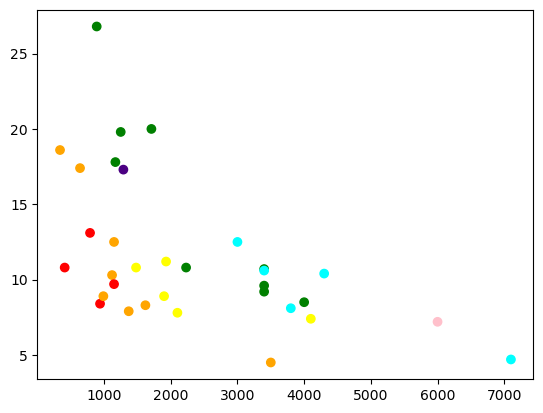

In [11]:
plt.scatter(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], color = O3_BBH["color"])

coefficients = np.polyfit(O3_BBH["luminosity_distance"], O3_BBH["network_matched_filter_snr"], 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(O3_BBH["luminosity_distance"]), max(O3_BBH["luminosity_distance"]), 100)
plt.plot(x, fit_line_O3(x), color="black")

y_pred = fit_line(O3_BBH["luminosity_distance"])
r2_value = r2_score(O3_BBH["network_matched_filter_snr"], y_pred)
print("R^2 value:", r2_value)

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.ylabel("SNR")
plt.xlabel("$D_L$")

Text(0, 0.5, '$D_L$')

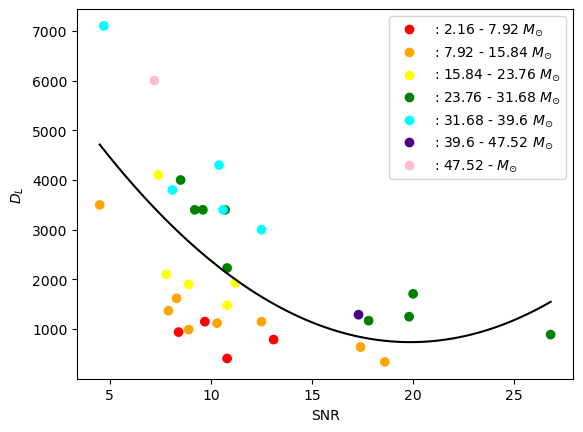

In [16]:
# Inverting so I can get a luminosity distance as a function of SNR (so it can be applied to O4 data):
plt.scatter(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], color = O3_BBH["color"])

coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)
plt.plot(x, fit_line_O3_BBH(x), color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.xlabel("SNR")
plt.ylabel("$D_L$")

In [17]:
O4 = pd.read_csv("../Data/real_events_O4_ALL.csv")

In [18]:
print(len(O4))

53


In [20]:
O4_BNS = pd.DataFrame(columns=O4.columns)
O4_BBH = pd.DataFrame(columns=O4.columns)

for index, row in O4.iterrows():
    if row["mass1"] < 2.16 or row["mass2"] < 2.16:
        O4_BNS = pd.concat([O4_BNS, pd.DataFrame([row])], ignore_index=True)
    if row["mass1"] >= 2.16 and row["mass2"] >= 2.16:
        O4_BBH = pd.concat([O4_BBH, pd.DataFrame([row])], ignore_index=True)

print(len(O4_BNS))
print(len(O4_BBH))

1
52


In [21]:
O4_BBH_reduced = O4_BBH["snr"]/1.6 

In [22]:
O4_BBH["predicted_luminosity_distance"] = fit_line_O3_BBH(O4_BBH["snr"])

Text(0, 0.5, '$D_L$')

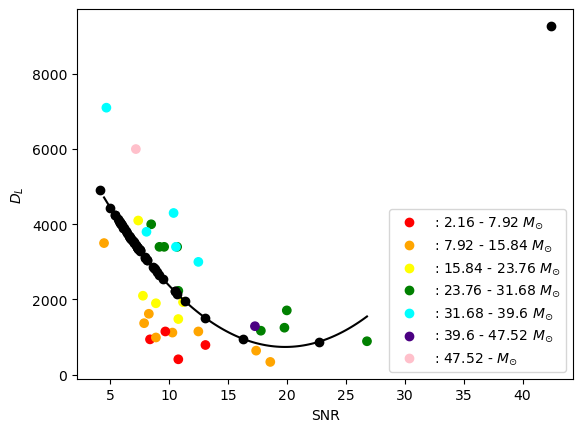

In [23]:
plt.scatter(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], color = O3_BBH["color"])
plt.scatter(O4_BBH["snr"], O4_BBH["predicted_luminosity_distance"], color = "black")

coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)
fit_line_O3_BBH = np.poly1d(coefficients)
x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)
plt.plot(x, fit_line_O3_BBH(x), color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.xlabel("SNR")
plt.ylabel("$D_L$")

Text(0, 0.5, 'SNR')

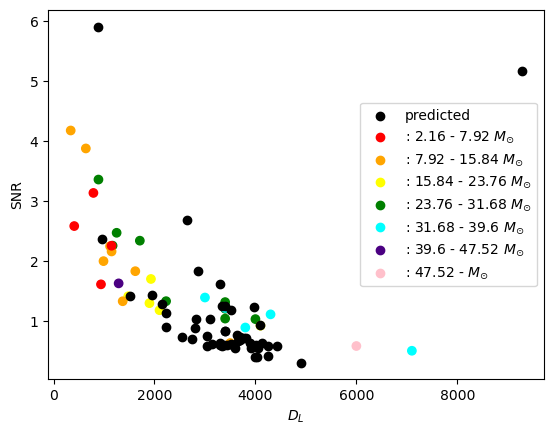

In [41]:
plt.scatter(O3_BBH["luminosity_distance"],O3_BBH["network_matched_filter_snr"]/np.sqrt(O3_BBH["mass_1_source"]+O3_BBH["mass_2_source"]), color = O3_BBH["color"])
plt.scatter(O4_BBH["predicted_luminosity_distance"],O4_BBH["snr"]/np.sqrt(O4_BBH["mass1"]+O4_BBH["mass2"]), color = "black", label="predicted")

#coefficients = np.polyfit(O3_BBH["network_matched_filter_snr"],O3_BBH["luminosity_distance"], 2)
#fit_line_O3_BBH = np.poly1d(coefficients)
#x = np.linspace(min(O3_BBH["network_matched_filter_snr"]), max(O3_BBH["network_matched_filter_snr"]), 100)
#plt.plot(fit_line_O3_BBH(x), x, color="black")

plt.scatter([], [], color="red", label=": 2.16 - 7.92 $M_{\odot}$")
plt.scatter([], [], color="orange", label=": 7.92 - 15.84 $M_{\odot}$")
plt.scatter([], [], color="yellow", label=": 15.84 - 23.76 $M_{\odot}$")
plt.scatter([], [], color="green", label=": 23.76 - 31.68 $M_{\odot}$")
plt.scatter([], [], color="cyan", label=": 31.68 - 39.6 $M_{\odot}$")
plt.scatter([], [], color="indigo", label=": 39.6 - 47.52 $M_{\odot}$")
plt.scatter([], [], color="pink", label=": 47.52 - $M_{\odot}$")

plt.legend()
plt.xlabel("$D_L$")
plt.ylabel("SNR")